In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

## 分析の概要と目的
data1は駅前に店舗を構えている洋菓子チェーン店の売上高`Sales`(万円/月)と,それぞれの駅の平均乗降客数`Passengers`(十人/日)のデータである.平均乗降客数を独立変数,売上高を従属変数として単回帰分析を行い,平均乗降客数が売上高に与える影響を検討することを目的とする.

In [143]:
# read data
df = pd.read_csv("data1.csv")
df

,Sales,Passengers
0,130,148
1,195,186
2,218,279
3,166,179
4,163,216
5,155,127
6,204,152
7,270,196
8,205,126
9,127,78


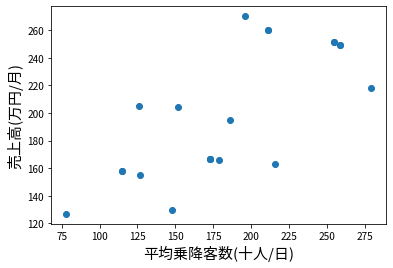

In [140]:
# plot data
plt.figure(facecolor="white")
plt.scatter(df["Passengers"],df["Sales"])
plt.xlabel("平均乗降客数(十人/日)",fontsize=15)
plt.ylabel("売上高(万円/月)",fontsize=15)
plt.show()

## scikit-learnを用いた回帰分析

In [4]:
from sklearn.linear_model import LinearRegression

X = df["Passengers"].to_numpy().reshape(-1,1)
y = df["Sales"].to_numpy().reshape(-1,1)
model = LinearRegression()
model.fit(X,y)
print('回帰方程式 y = %.2fx + %.2f' % (model.coef_ , model.intercept_))
print(model.score(X,y))

回帰方程式 y = 0.56x + 94.59
0.4606429875805057


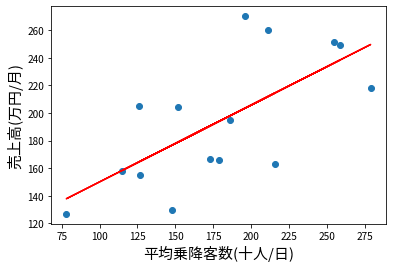

In [5]:
# plot data
plt.figure(facecolor="white")
plt.scatter(df["Passengers"],df["Sales"])
plt.plot(X,model.predict(X),c="red")
plt.xlabel("平均乗降客数(十人/日)",fontsize=15)
plt.ylabel("売上高(万円/月)",fontsize=15)
plt.show()

## statsmodelを用いた回帰分析

In [6]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(X))
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     11.10
Date:                Tue, 16 Feb 2021   Prob (F-statistic):            0.00540
Time:                        11:11:04   Log-Likelihood:                -73.925
No. Observations:                  15   AIC:                             151.8
Df Residuals:                      13   BIC:                             153.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.5850     31.396      3.013      0.0

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 1要素ずつ取得できるようにしたクラス

In [141]:
import statsmodels.api as sm

# OLS class
# instantiate : need X and y
# fit : fitting and create result for function "summary"
# summary : return result of OLS. If args is "all",return all results. If args is column name,return
#          the value or string that was in the column. For return coef,std err,t,P>|t|,[0.025,and 0.975]
#          you use option to get value.
class OLS:
    def __init__(self,X,y):
        self.X = X
        self.y = y
        self.model = sm.OLS(self.y, sm.add_constant(self.X))
    def fit(self):
        self.results=self.model.fit()
        self.l = self.results.summary().as_csv().replace(" ","").replace(":,",",").split('\n')[1:]
        if(len(X)<19): # for warnings
            self.l = self.l[:-3]
        self.l = ",".join(self.l).replace(",,,",",").replace(",,",",").split(',')
        self.d = {self.l[0]:self.l[1],self.l[2]:float(self.l[3]),self.l[4]:self.l[5],self.l[6]: float(self.l[7]),self.l[8]:self.l[9],self.l[10]: float(self.l[11]),self.l[12]:self.l[13]+","+self.l[14],self.l[15]: float(self.l[16]),self.l[17]:self.l[18],
            self.l[19]: float(self.l[20]),self.l[21]:int(self.l[22]),self.l[23]: float(self.l[24]),self.l[25]:int(self.l[26]),self.l[27]: float(self.l[28]),self.l[29]:int(self.l[30]),self.l[31]:self.l[32],
             self.l[39]:{self.l[33]: float(self.l[40]),self.l[34]: float(self.l[41]),self.l[35]: float(self.l[42]),self.l[36]: float(self.l[43]),self.l[37]: float(self.l[44]),self.l[38]: float(self.l[45])},
             self.l[46]:{self.l[33]: float(self.l[47]),self.l[34]: float(self.l[48]),self.l[35]: float(self.l[49]),self.l[36]: float(self.l[50]),self.l[37]: float(self.l[51]),self.l[38]: float(self.l[52])},
            self.l[53]: float(self.l[54]),self.l[55]: float(self.l[56]),self.l[57]: float(self.l[58]),self.l[59]: float(self.l[60]),self.l[61]: float(self.l[62]),self.l[63]: float(self.l[64]),self.l[65]: float(self.l[66]),self.l[67]: float(self.l[68])}
    def summary(self,column="all",option=None):
        self.column = column
        self.option=option
        if(self.column=="all"):
            return self.d
        elif self.option!=None:
            return self.d[column][self.option]
        else:
            return self.d[column]

In [144]:
model = OLS(X, y)
model.fit()
model.summary()
#model.summary(column="const",option="coef")

{'Dep.Variable': 'y',
 'R-squared': 0.461,
 'Model': 'OLS',
 'Adj.R-squared': 0.419,
 'Method': 'LeastSquares',
 'F-statistic': 11.1,
 'Date': 'Tue,16Feb2021',
 'Prob(F-statistic)': 0.0054,
 'Time': '15:13:58',
 'Log-Likelihood': -73.925,
 'No.Observations': 15,
 'AIC': 151.8,
 'DfResiduals': 13,
 'BIC': 153.3,
 'DfModel': 1,
 'CovarianceType': 'nonrobust',
 'const': {'coef': 94.585,
  'stderr': 31.396,
  't': 3.013,
  'P>|t|': 0.01,
  '[0.025': 26.758,
  '0.975]': 162.412},
 'x1': {'coef': 0.5553,
  'stderr': 0.167,
  't': 3.332,
  'P>|t|': 0.005,
  '[0.025': 0.195,
  '0.975]': 0.915},
 'Omnibus': 0.592,
 'Durbin-Watson': 1.015,
 'Prob(Omnibus)': 0.744,
 'Jarque-Bera(JB)': 0.636,
 'Skew': 0.332,
 'Prob(JB)': 0.728,
 'Kurtosis': 2.241,
 'Cond.No.': 638.0}

## 結果の解釈
- 回帰式は売上高=94.5850+0.5553×平均乗降客数である.
- t検定の結果,有意確率は0.0054で有意である.
- 自由度調整済み決定係数が0.419であるから,求めた回帰式で約41.9%データを説明することができる.